In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Loading the Data

In [3]:
with np.load("mnist.npz") as data:
    x_train = data["training_images"]
    y_train = data["training_labels"]
    x_test = data["test_images"]
    y_test = data["test_labels"]
    v_x = data["validation_images"]
    v_y = data["validation_labels"]

### Merging Training and Validation Datasets

In [4]:
x_train = np.append(x_train,v_x,axis=0)
y_train = np.append(y_train,v_y,axis=0)

In [5]:
x_train.shape,y_train.shape

((60000, 784, 1), (60000, 10, 1))

### Flattening the Images

In [6]:
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test, (10000,28*28))

### Merging Dummies for Labels

In [7]:
y_t = []
for i in range(len(y_train)):
    y_t.append([i[0] for i in y_train[i]].index(1))
y_train = np.array(y_t)

In [8]:
y_tt = []
for i in range(len(y_test)):
    y_tt.append([i[0] for i in y_test[i]].index(1))
y_test = np.array(y_tt)

## Random Sampling and Centroid Calculation

In [9]:
k_cen={}
for i in set(y_train):
    cen5=[]
    for _ in range(5):
        ind = random.choices([k for k,j in enumerate(y_train==i) if j==True],k=int(sum(y_train==i)*0.2))
        x_red = np.array(x_train[ind])
        centroid=[x_red[:,j].mean() for j in range(x_red.shape[1])]
        cen5.append(centroid)
    k_cen[i]=cen5

Label 0


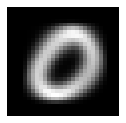

Label 1


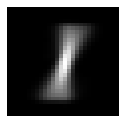

Label 2


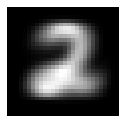

Label 3


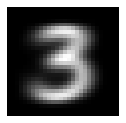

Label 4


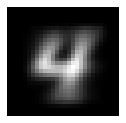

Label 5


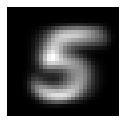

Label 6


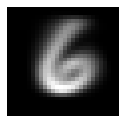

Label 7


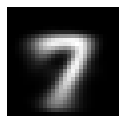

Label 8


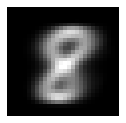

Label 9


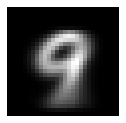

In [10]:
for i in range(len(k_cen)):
    print(f"Label {i}")
    image_plot = np.reshape(np.array(k_cen[i][0]), (28,28))
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(image_plot, cmap="gray", aspect="auto")
    plt.show()

## Euclidean Distance Calculator

In [11]:
coddist = lambda a,b: np.sqrt(np.sum((a-b)**2))

## Predictions

In [12]:
y_preds=[]
for i in x_test:
    dists = []
    for j in k_cen:
        for h in range(5):
            dists.append(coddist(i,np.array(k_cen[j][h])))
    dists = {j:i for i,j in enumerate(dists)}
    maxers = []
    for j in sorted(dists)[:5]:
        maxers.append(dists[j]//5)
    y_preds.append(max(maxers))
y_preds = np.array(y_preds)

## Accuracy Metrics

### Total Accuracy

In [13]:
tot = ((sum(y_preds==y_test)/len(y_preds))*100).round(2)
print(f"Total Accuracy : {tot}%")

Total Accuracy : 81.93%


### Class Wise Accuracy

In [14]:
lab_acc = []
for i in set(y_train):
    s = ((sum((y_test[y_preds==i]-y_preds[y_preds==i])==0)/len(y_preds[y_preds==i]))*100).round(2)
    lab_acc.append(s)
    print(f"Accuracy for Label {i}: {s}%")

Accuracy for Label 0: 91.51%
Accuracy for Label 1: 79.55%
Accuracy for Label 2: 90.06%
Accuracy for Label 3: 80.12%
Accuracy for Label 4: 83.37%
Accuracy for Label 5: 74.08%
Accuracy for Label 6: 85.6%
Accuracy for Label 7: 91.06%
Accuracy for Label 8: 76.47%
Accuracy for Label 9: 71.95%


## Cherry on the Top

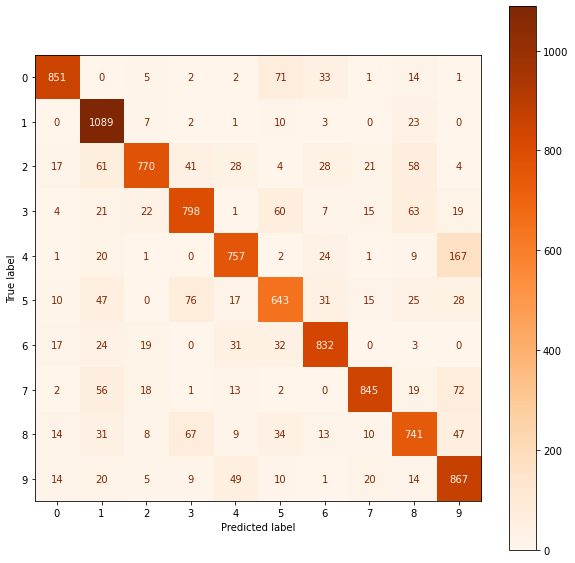

In [15]:
conf = ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap = "Oranges")
fig = conf.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)

In [16]:
print(classification_report(y_test, y_preds, target_names = [str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       980
           1       0.80      0.96      0.87      1135
           2       0.90      0.75      0.82      1032
           3       0.80      0.79      0.80      1010
           4       0.83      0.77      0.80       982
           5       0.74      0.72      0.73       892
           6       0.86      0.87      0.86       958
           7       0.91      0.82      0.86      1028
           8       0.76      0.76      0.76       974
           9       0.72      0.86      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



1)
Actual Label: 7
Predicted Label: 7


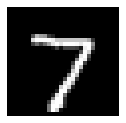

2)
Actual Label: 2
Predicted Label: 2


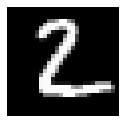

3)
Actual Label: 1
Predicted Label: 1


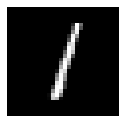

4)
Actual Label: 0
Predicted Label: 0


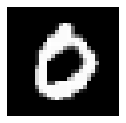

5)
Actual Label: 4
Predicted Label: 4


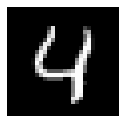

6)
Actual Label: 1
Predicted Label: 1


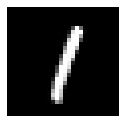

7)
Actual Label: 4
Predicted Label: 4


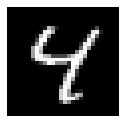

8)
Actual Label: 9
Predicted Label: 9


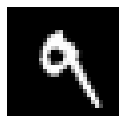

9)
Actual Label: 5
Predicted Label: 6


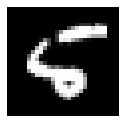

10)
Actual Label: 9
Predicted Label: 9


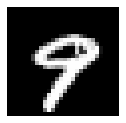

11)
Actual Label: 0
Predicted Label: 0


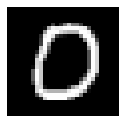

12)
Actual Label: 6
Predicted Label: 6


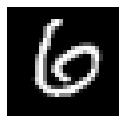

13)
Actual Label: 9
Predicted Label: 9


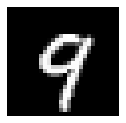

14)
Actual Label: 0
Predicted Label: 0


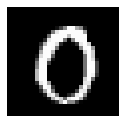

15)
Actual Label: 1
Predicted Label: 1


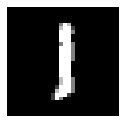

16)
Actual Label: 5
Predicted Label: 5


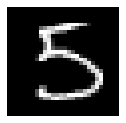

17)
Actual Label: 9
Predicted Label: 9


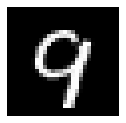

18)
Actual Label: 7
Predicted Label: 7


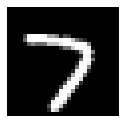

19)
Actual Label: 3
Predicted Label: 3


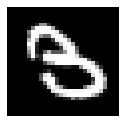

20)
Actual Label: 4
Predicted Label: 4


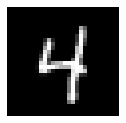

21)
Actual Label: 9
Predicted Label: 9


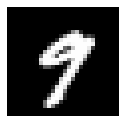

22)
Actual Label: 6
Predicted Label: 6


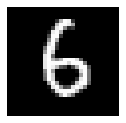

23)
Actual Label: 6
Predicted Label: 4


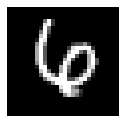

24)
Actual Label: 5
Predicted Label: 5


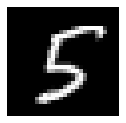

25)
Actual Label: 4
Predicted Label: 4


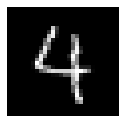

26)
Actual Label: 0
Predicted Label: 0


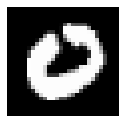

27)
Actual Label: 7
Predicted Label: 7


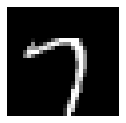

28)
Actual Label: 4
Predicted Label: 4


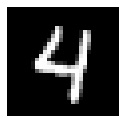

29)
Actual Label: 0
Predicted Label: 0


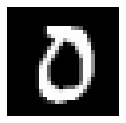

30)
Actual Label: 1
Predicted Label: 1


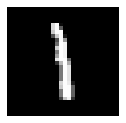

31)
Actual Label: 3
Predicted Label: 3


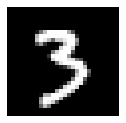

32)
Actual Label: 1
Predicted Label: 1


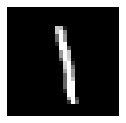

33)
Actual Label: 3
Predicted Label: 3


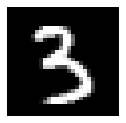

34)
Actual Label: 4
Predicted Label: 6


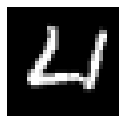

35)
Actual Label: 7
Predicted Label: 7


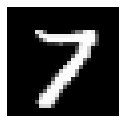

36)
Actual Label: 2
Predicted Label: 2


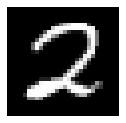

37)
Actual Label: 7
Predicted Label: 7


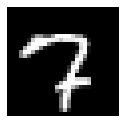

38)
Actual Label: 1
Predicted Label: 1


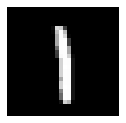

39)
Actual Label: 2
Predicted Label: 3


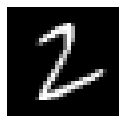

40)
Actual Label: 1
Predicted Label: 1


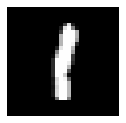

41)
Actual Label: 1
Predicted Label: 1


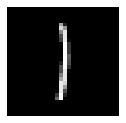

42)
Actual Label: 7
Predicted Label: 7


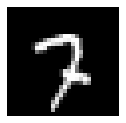

43)
Actual Label: 4
Predicted Label: 4


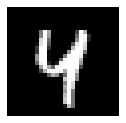

44)
Actual Label: 2
Predicted Label: 1


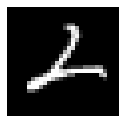

45)
Actual Label: 3
Predicted Label: 3


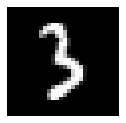

46)
Actual Label: 5
Predicted Label: 5


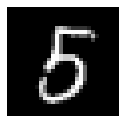

47)
Actual Label: 1
Predicted Label: 5


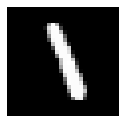

48)
Actual Label: 2
Predicted Label: 2


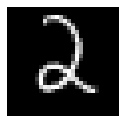

49)
Actual Label: 4
Predicted Label: 4


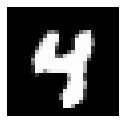

50)
Actual Label: 4
Predicted Label: 4


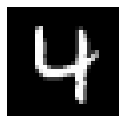

In [17]:
for h,i,j,k in zip([i for i in range(1,51)],x_test[:50,:],y_test[:50],y_preds[:50]):
    print(f"{h})\nActual Label: {j}\nPredicted Label: {k}")
    image_plot = np.reshape(i, (28,28))
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(image_plot, cmap="gray", aspect="auto")
    plt.show()